# Laboratorio 3: Clasificación de rótulos de tráfico utilizando CNN Le-Net

- Mark Albrand 21004
- Jimena Hernandez 21199

In [260]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

## Preparación de datos

### Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba.

In [261]:
entrenamiento = pd.read_pickle('data/entrenamiento.p')
validacion = pd.read_pickle('data/validacion.p')
prueba = pd.read_pickle('data/prueba.p')

In [262]:
entrenamiento

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [263]:
prueba

{'sizes': array([[53, 54],
        [42, 45],
        [48, 52],
        ...,
        [29, 29],
        [48, 49],
        [32, 31]], dtype=uint8),
 'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8),
 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ..

In [264]:
validacion

{'coords': array([[  6,   5,  22,  20],
        [  6,   5,  22,  20],
        [  6,   5,  23,  21],
        ...,
        [ 10,   8,  99,  90],
        [ 10,  11, 112, 108],
        [ 13,  12, 138, 125]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[13, 12, 12],
          [12, 11, 12],
          [13, 11, 11],
          ...,
          [14, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [13, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         [[13, 12, 13],
          [12, 11, 12],
          [12, 12, 12],
          ...,
          [13, 12, 11],
          [13, 12, 11],
          [12, 12, 11]],
 
         ...,
 
         [[16, 15, 15],
          [15, 14, 14],
          [15, 15, 15],
          ...,
          [13, 12, 12],
          [14, 13, 13],
          [14, 13, 13]],
 
         [[18, 16, 16],
          [17, 15, 1

### Realizar preprocesamiento de las imágenes, como redimensionarlas a un tamaño estándar, normalización, etc.

In [265]:
print("Tamaño de los datos de entrenamiento: ", len(entrenamiento['features']))
print("Tamaño de los datos de validación: ", len(validacion['features']))
print("Tamaño de los datos de prueba: ", len(prueba['features']))

Tamaño de los datos de entrenamiento:  34799
Tamaño de los datos de validación:  4410
Tamaño de los datos de prueba:  12630


#### Dimensión de las imagenes : 32x32 
Se decidió no modificar esta dimensión ya que todas tienen la misma.

In [266]:
print("Dimensiones de las imágenes de entrenamiento: ", entrenamiento['features'][5000].shape)
print("Dimensiones de las imágenes de validación: ", validacion['features'][100].shape)
print("Dimensiones de las imágenes de prueba: ", prueba['features'][5000].shape)

Dimensiones de las imágenes de entrenamiento:  (32, 32, 3)
Dimensiones de las imágenes de validación:  (32, 32, 3)
Dimensiones de las imágenes de prueba:  (32, 32, 3)


In [267]:
dim1 = []
dim2 = []

for image in entrenamiento['features']:
    d1, d2, colors = image.shape
    dim1.append(d1)
    dim2.append(d2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

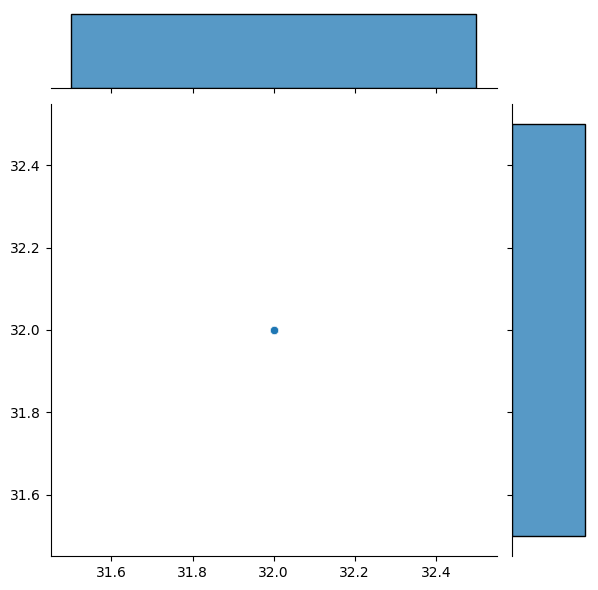

In [268]:
sns.jointplot(x = dim1, y = dim2)

In [269]:
dim3 = []
dim4 = []

for image in validacion['features']:
    d3, d4, colors = image.shape
    dim3.append(d3)
    dim4.append(d4)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

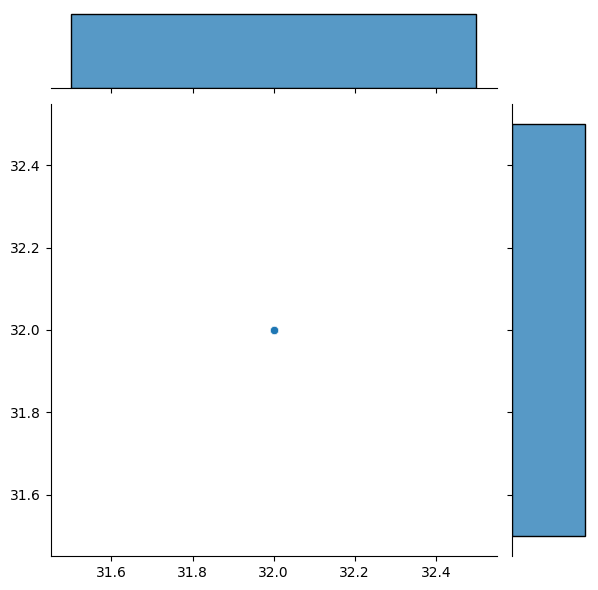

In [270]:
sns.jointplot(x = dim3, y = dim4)

In [271]:
dim5 = []
dim6 = []

for image in prueba['features']:
    d5, d6, colors = image.shape
    dim5.append(d5)
    dim6.append(d6)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

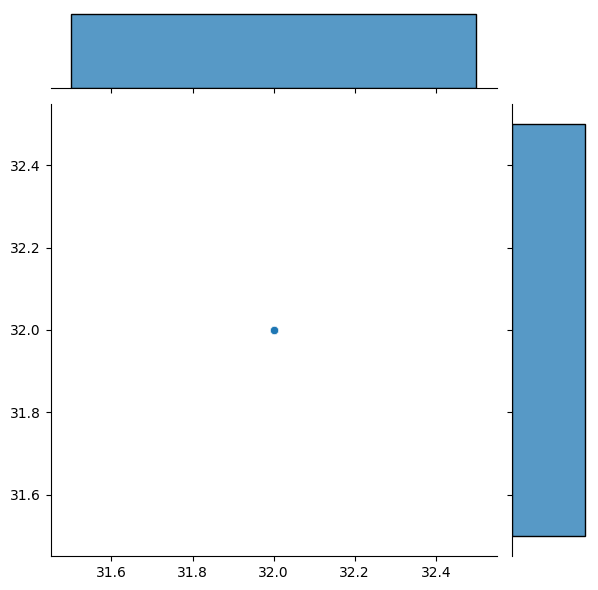

In [272]:
sns.jointplot(x = dim5, y = dim6)

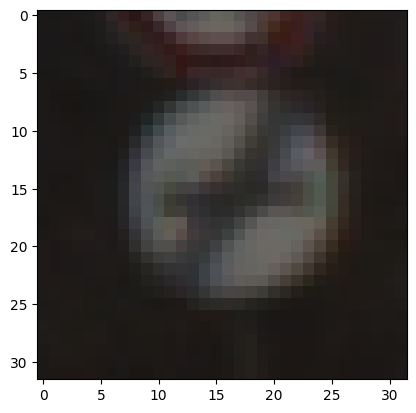

In [273]:
plt.imshow(entrenamiento['features'][1])

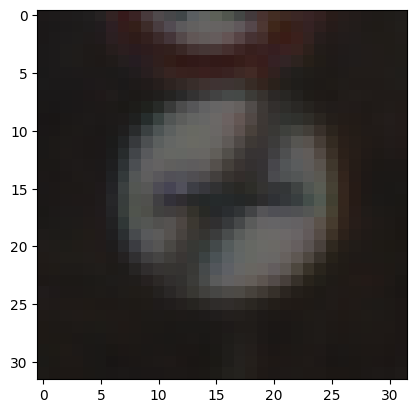

In [274]:
plt.imshow(entrenamiento['features'][2])

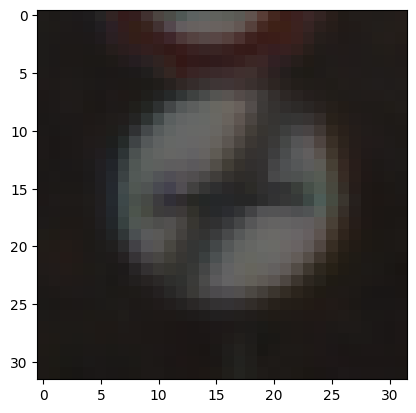

In [275]:
plt.imshow(entrenamiento['features'][3])

Se puede observar con las imágenes anteriores que el conjunto de datos ya posee información artificial, resultante de aplicar distintos filtros y transformaciones a las imágenes originales. Por lo tanto, no se realizará ningún tipo de preprocesamiento adicional a las imágenes.

## Construcción del modelo
- Utilizar la biblioteca de aprendizaje profundo TensorFlow para construir la arquitectura Le-Net.
- Definir la estructura de capas convolucionales, capas de pooling y capas fully connected.
- Explicar la importancia de la función de pérdida y el optimizador

In [276]:
import tensorflow as tf

x_train = entrenamiento['features']
y_train = entrenamiento['labels']

x_validation = validacion['features']
y_validation = validacion['labels']

x_test = prueba['features']
y_test = prueba['labels']

x_train = x_train.astype('float32') / 255
x_validation = x_validation.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 43)
y_validation = tf.keras.utils.to_categorical(y_validation, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)

In [277]:
print("Tamaño de x_train: ", x_train.shape)

print("Tamaño de y_train: ", y_train.shape)
print(y_train)

Tamaño de x_train:  (34799, 32, 32, 3)
Tamaño de y_train:  (34799, 43)
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [278]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [279]:
forma_imagen = entrenamiento['features'][0].shape

In [280]:
# Configurar el modelo

modelo = Sequential()

# Capa convolucional 1
modelo.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=forma_imagen, activation='relu'))
# Capa de pooling 1
modelo.add(MaxPool2D(pool_size=(2, 2)))

# Capa convolucional 2
modelo.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=forma_imagen, activation='relu'))
# Capa de pooling 2
modelo.add(MaxPool2D(pool_size=(2, 2)))

# Aplanar la imagen
modelo.add(Flatten())

# Capa fully connected
modelo.add(Dense(128, activation='relu'))

# Capa de salida
modelo.add(Dense(43, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [281]:
from tensorflow.keras.callbacks import EarlyStopping

modelo.compile(
    loss='categorical_crossentropy',  # Función de pérdida para problemas de clasificación multiclase
    optimizer='adam',
    metrics=['accuracy', 'precision']
)

early_stop = EarlyStopping(monitor='val_loss', patience=2)

BATCH_SIZE = 32

In [282]:
modelo.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 11, 11, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,875 (956.54 KB)

 Trainable params: 244,875 (956.54 KB)

 Non-trainable params: 0 (0.00 B)

In [283]:
modelo.fit(
    x_train, 
    y_train, 
    epochs=10, 
    batch_size=BATCH_SIZE, 
    validation_data=(x_validation, y_validation), 
    callbacks=[early_stop]
)

Epoch 1/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5255 - loss: 1.7805 - precision: 0.8373 - val_accuracy: 0.8921 - val_loss: 0.4603 - val_precision: 0.9259
Epoch 2/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9626 - loss: 0.1483 - precision: 0.9752 - val_accuracy: 0.9159 - val_loss: 0.3249 - val_precision: 0.9341
Epoch 3/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9838 - loss: 0.0646 - precision: 0.9884 - val_accuracy: 0.9320 - val_loss: 0.3294 - val_precision: 0.9449
Epoch 4/10
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9920 - loss: 0.0329 - precision: 0.9939 - val_accuracy: 0.9299 - val_loss: 0.3323 - val_precision: 0.9350


### Evaluación del modelo

In [284]:
perdidas = pd.DataFrame(modelo.history.history)

<Axes: >

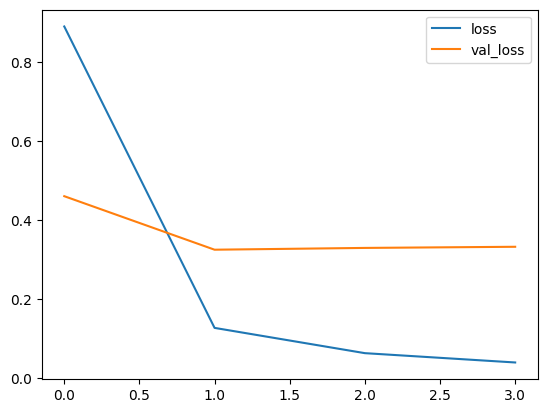

In [285]:
perdidas[['loss','val_loss']].plot()

In [286]:
test_loss, test_accuracy, test_precision = modelo.evaluate(x_test, y_test)

print("Precisión en el conjunto de prueba: ", test_accuracy)
print("Precisión en el conjunto de prueba: ", test_precision)
print("Pérdida en el conjunto de prueba: ", test_loss)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9173 - loss: 0.4565 - precision: 0.9280
Precisión en el conjunto de prueba:  0.917260468006134
Precisión en el conjunto de prueba:  0.929499089717865
Pérdida en el conjunto de prueba:  0.46414071321487427
